# Working with sqlite databases in Jupyter for Visualizing European Soccer Match Data 

This post includes code and notes from [data-analysis-using-sql](https://www.kaggle.com/dimarudov/data-analysis-using-sql).

In [1]:
import sqlalchemy as db
import sqlite3
import pandas as pd
import numpy as np

In [2]:
engine = db.create_engine('sqlite:///database.sqlite')
connection = engine.connect()
metadata = db.MetaData()

In [3]:
connection

In [4]:
engine.execute("SELECT * FROM Country LIMIT 10").fetchall()

[(1, 'Belgium'),
 (1729, 'England'),
 (4769, 'France'),
 (7809, 'Germany'),
 (10257, 'Italy'),
 (13274, 'Netherlands'),
 (15722, 'Poland'),
 (17642, 'Portugal'),
 (19694, 'Scotland'),
 (21518, 'Spain')]

In [5]:
%load_ext sql

In [6]:
%sql sqlite:///database.sqlite

In [7]:
%%sql
SELECT *
FROM Country
LIMIT 10

 * sqlite:///database.sqlite
Done.


id,name
1,Belgium
1729,England
4769,France
7809,Germany
10257,Italy
13274,Netherlands
15722,Poland
17642,Portugal
19694,Scotland
21518,Spain


In [8]:
%%sql
SELECT id
,name
FROM Country
WHERE name = "England"

 * sqlite:///database.sqlite
Done.


id,name
1729,England


In [9]:
%%sql
SELECT * FROM League LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,country_id,name
1,1,Belgium Jupiler League
1729,1729,England Premier League
4769,4769,France Ligue 1
7809,7809,Germany 1. Bundesliga
10257,10257,Italy Serie A
13274,13274,Netherlands Eredivisie
15722,15722,Poland Ekstraklasa
17642,17642,Portugal Liga ZON Sagres
19694,19694,Scotland Premier League
21518,21518,Spain LIGA BBVA


In [10]:
%%sql
SELECT * FROM Match LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,goal,shoton,shotoff,foulcommit,card,cross,corner,possession,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,IWA,LBH,LBD,LBA,PSH,PSD,PSA,WHH,WHD,WHA,SJH,SJD,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,1,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.73,3.4,5,1.75,3.35,4.2,1.85,3.2,3.5,1.8,3.3,3.75,None,None,None,1.7,3.3,4.33,1.9,3.3,4,1.65,3.4,4.5,1.78,3.25,4,1.73,3.4,4.2
2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.95,3.2,3.6,1.8,3.3,3.95,1.9,3.2,3.5,1.9,3.2,3.5,None,None,None,1.83,3.3,3.6,1.95,3.3,3.8,2,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.6
3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,2.38,3.3,2.75,2.4,3.3,2.55,2.6,3.1,2.3,2.5,3.2,2.5,None,None,None,2.5,3.25,2.4,2.63,3.3,2.5,2.35,3.25,2.65,2.5,3.2,2.5,2.3,3.2,2.75
4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,1.44,3.75,7.5,1.4,4,6.8,1.4,3.9,6,1.44,3.6,6.5,None,None,None,1.44,3.75,6,1.44,4,7.5,1.45,3.75,6.5,1.5,3.75,5.5,1.44,3.75,6.5
5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,3,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,5,3.5,1.65,5,3.5,1.6,4,3.3,1.7,4,3.4,1.72,None,None,

In [11]:
%%sql
SELECT * FROM Player LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
6,27316,Aaron Hunt,158138,1986-09-04 00:00:00,182.88,161
7,564793,Aaron Kuhl,221280,1996-01-30 00:00:00,172.72,146
8,30895,Aaron Lennon,152747,1987-04-16 00:00:00,165.1,139
9,528212,Aaron Lennox,206592,1993-02-19 00:00:00,190.5,181
10,101042,Aaron Meijers,188621,1987-10-28 00:00:00,175.26,170


In [12]:
%%sql
SELECT * FROM Player_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
1,218353,505942,2016-02-18 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
2,218353,505942,2015-11-19 00:00:00,67,71,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,71,70,45,54,48,65,69,69,6,11,10,8,8
3,218353,505942,2015-09-21 00:00:00,62,66,right,medium,medium,49,44,71,61,44,51,45,39,64,49,60,64,59,47,65,55,58,54,76,35,63,41,45,54,48,65,66,69,6,11,10,8,8
4,218353,505942,2015-03-20 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7
5,218353,505942,2007-02-22 00:00:00,61,65,right,medium,medium,48,43,70,60,43,50,44,38,63,48,60,64,59,46,65,54,58,54,76,34,62,40,44,53,47,62,63,66,5,10,9,7,7
6,189615,155782,2016-04-21 00:00:00,74,76,left,high,medium,80,53,58,71,40,73,70,69,68,71,79,78,78,67,90,71,85,79,56,62,68,67,60,66,59,76,75,78,14,7,9,9,12
7,189615,155782,2016-04-07 00:00:00,74,76,left,high,medium,80,53,58,71,32,73,70,69,68,71,79,78,78,67,90,71,85,79,56,60,68,67,60,66,59,76,75,78,14,7,9,9,12
8,189615,155782,2016-01-07 00:00:00,73,75,left,high,medium,79,52,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,59,67,66,58,65,59,76,75,78,14,7,9,9,12
9,189615,155782,2015-12-24 00:00:00,73,75,left,high,medium,79,51,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,58,67,66,58,65,59,76,75,78,14,7,9,9,12
10,189615,155782,2015-12-17 00:00:00,73,75,left,high,medium,79,51,57,70,29,71,68,69,68,70,79,78,78,67,90,71,84,79,56,58,67,66,58,65,59,76,75,78,14,7,9,9,12


In [13]:
%%sql
SELECT * FROM Team LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
1,9987,673,KRC Genk,GEN
2,9993,675,Beerschot AC,BAC
3,10000,15005,SV Zulte-Waregem,ZUL
4,9994,2007,Sporting Lokeren,LOK
5,9984,1750,KSV Cercle Brugge,CEB
6,8635,229,RSC Anderlecht,AND
7,9991,674,KAA Gent,GEN
8,9998,1747,RAEC Mons,MON
9,7947,None,FCV Dender EH,DEN
10,9985,232,Standard de Liège,STL


In [14]:
%%sql
SELECT * FROM Team_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
1,434,9930,2010-02-22 00:00:00,60,Balanced,None,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
2,434,9930,2014-09-19 00:00:00,52,Balanced,48,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,434,9930,2015-09-10 00:00:00,47,Balanced,41,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
4,77,8485,2010-02-22 00:00:00,70,Fast,None,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
5,77,8485,2011-02-22 00:00:00,47,Balanced,None,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
6,77,8485,2012-02-22 00:00:00,58,Balanced,None,Little,62,Mixed,Organised,45,Normal,70,Lots,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
7,77,8485,2013-09-20 00:00:00,62,Balanced,None,Little,45,Mixed,Organised,40,Normal,50,Normal,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover
8,77,8485,2014-09-19 00:00:00,58,Balanced,64,Normal,62,Mixed,Organised,56,Normal,68,Lots,57,Normal,Organised,41,Medium,42,Press,60,Normal,Cover
9,77,8485,2015-09-10 00:00:00,59,Balanced,64,Normal,53,Mixed,Organised,51,Normal,72,Lots,63,Normal,Free Form,49,Medium,45,Press,63,Normal,Cover
10,614,8576,2010-02-22 00:00:00,60,Balanced,None,Little,40,Mixed,Organised,45,Normal,35,Normal,55,Normal,Organised,30,Deep,70,Double,30,Narrow,Offside Trap


In [15]:
%%sql
CREATE TABLE Team_table AS
SELECT * FROM Team_Attributes LIMIT 10;

 * sqlite:///database.sqlite
Done.


[]

In [16]:
%%sql
DROP TABLE IF EXISTS Team_table

 * sqlite:///database.sqlite
Done.


[]

In [17]:
sql_query = %sql SELECT * FROM Team LIMIT 10
df = sql_query.DataFrame()

 * sqlite:///database.sqlite
Done.


In [18]:
df

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
5,6,8635,229.0,RSC Anderlecht,AND
6,7,9991,674.0,KAA Gent,GEN
7,8,9998,1747.0,RAEC Mons,MON
8,9,7947,NaN,FCV Dender EH,DEN
9,10,9985,232.0,Standard de Liège,STL


 * sqlite:///database.sqlite
Done.


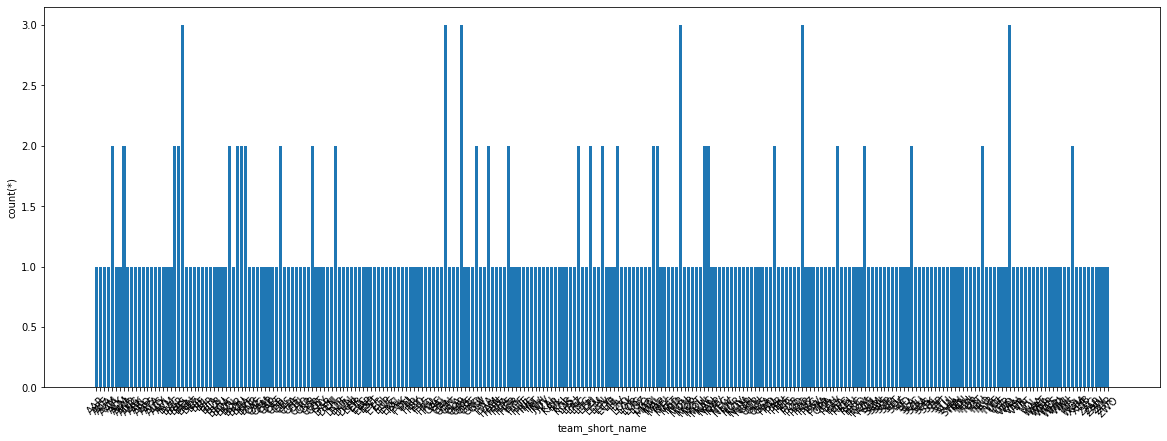

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,7))

plot = %sql SELECT team_short_name, count(*) FROM Team GROUP BY team_short_name ORDER BY team_short_name
plot.bar();

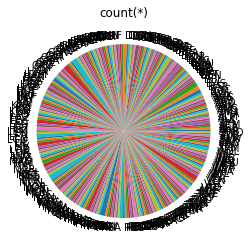

In [20]:
plot.pie();

In [21]:
type(plot)

sql.run.ResultSet

In [22]:
# #Imports

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import sqlite3
# import matplotlib.pyplot as plt

# # Input data files are available in the "../input/" directory.
# # For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# path = "../input/"  #Insert path here
# database = path + 'database.sqlite'

First we will create the connection to the DB, and see what tables we have

In [23]:
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", connection)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [24]:
countries = pd.read_sql("""SELECT *
                        FROM Country;""", connection)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


In [25]:
leagues = pd.read_sql("""SELECT *
                        FROM League
                        JOIN Country ON Country.id = League.country_id;""", connection)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


In [26]:
teams = pd.read_sql("""SELECT *
                        FROM Team
                        ORDER BY team_long_name
                        LIMIT 10;""", connection)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,16848,8350,29,1. FC Kaiserslautern,KAI
1,15624,8722,31,1. FC Köln,FCK
2,16239,8165,171,1. FC Nürnberg,NUR
3,16243,9905,169,1. FSV Mainz 05,MAI
4,11817,8576,614,AC Ajaccio,AJA
5,11074,108893,111989,AC Arles-Avignon,ARL
6,49116,6493,1714,AC Bellinzona,BEL
7,26560,10217,650,ADO Den Haag,HAA
8,9537,8583,57,AJ Auxerre,AUX
9,9547,9829,69,AS Monaco,MON


In [27]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", connection)
detailed_matches

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [28]:
# Star with Spain Real Madrid CF, barcelonat

In [29]:


leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", connection)
leages_by_season



,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


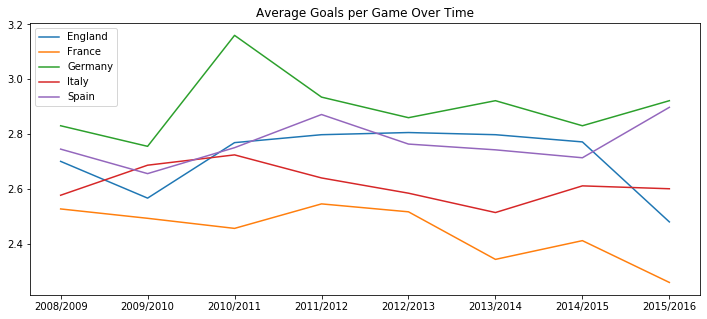

In [30]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

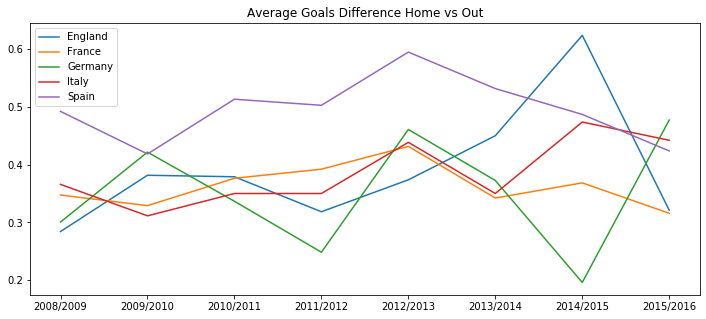

In [31]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

In [32]:


players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", connection)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


In [33]:
players_height.calc_height

0     165.0
1     168.0
2     170.0
3     173.0
4     175.0
5     178.0
6     180.0
7     183.0
8     185.0
9     188.0
10    191.0
11    193.0
12    195.0
Name: calc_height, dtype: float64

In [34]:
# players_height.plot(x=['calc_height'],y=['avg_overall_rating'],figsize=(12,5),title='Potential vs Height')